In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [194]:
train=pd.read_csv('train.csv') #Leendo el dataset de insuficiencia cardiaca.

In [195]:
train.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [196]:
#Implementando librería plotly para la visualización en grafica del dataset
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Visualización de el número de muertes por Edad
fig = px.histogram(train, x="Age", color="Mortality", title="Número de muertes por Edad", height=400, width=600)
fig.show("svg")
#fig.show()
#fig.show(renderer="colab")

In [ ]:
#Visualización de el número de muertes por Género
fig = px.histogram(train, x="Gender", color="Mortality", title="Número de muertes por Género", height=400, width=600)
fig.show("svg")
#fig.show()
#fig.show(renderer="colab")

In [ ]:
#Visualización de el número de muertes por resultados electrocardiográficos
fig = px.histogram(train, x="restecg", color="Mortality", title="Número de muertes por resultados electrocardiográficos", height=400, width=600)
fig.show("svg")
#fig.show()
#fig.show(renderer="colab")

In [ ]:
pd.unique(train['restecg'])

array([2, 0, 1], dtype=int64)

In [ ]:
pd.unique(train['Gender'])

array(['Female', 'Male'], dtype=object)

In [ ]:
pd.unique(train['Age'])

array([45, 51, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 24, 25, 35, 38,
       40, 44, 46, 47, 50, 52, 53, 54, 64, 67, 68, 69, 70, 77],
      dtype=int64)

In [ ]:
#Dado que encontre que hay personas con edad null, cunatos existen
train['Age'].isna().sum()

0

In [ ]:
train['Age'].mean()

54.29347826086956

In [ ]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [ ]:
train["Age"].isna().sum()

0

In [ ]:
train.isna().sum()

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

In [ ]:
# Aqui toma las columnas que me sirven para le problema
train=train[['restecg','Gender','Age','Mortality']]


In [ ]:
# Este elimina las filas que tengan algun nulo
train=train.dropna() 
#Luego eliminados los duplicados
train=train.drop_duplicates()

In [ ]:
trainDatax=train[['restecg','Gender','Age']]
trainDatay=train[['Mortality']]
print(trainDatay.head(),"\n", trainDatax.head())

   Mortality
0          0
1          0
2          0
4          0
5          1 
    restecg  Gender  Age
0        2  Female   45
1        0  Female   51
2        1  Female   55
4        2  Female   56
5        2  Female   56


In [ ]:
#Trabajar las edades
#Facilita encontrar patrones para RN.
pd.cut(trainDatax['Age'],20, retbins=True)

(0      (42.55, 45.2]
 1      (50.5, 53.15]
 2      (53.15, 55.8]
 4      (55.8, 58.45]
 5      (55.8, 58.45]
            ...      
 142    (37.25, 39.9]
 143    (39.9, 42.55]
 147    (42.55, 45.2]
 149    (45.2, 47.85]
 150    (47.85, 50.5]
 Name: Age, Length: 75, dtype: category
 Categories (20, interval[float64, right]): [(23.947, 26.65] < (26.65, 29.3] < (29.3, 31.95] < (31.95, 34.6] ... (66.4, 69.05] < (69.05, 71.7] < (71.7, 74.35] < (74.35, 77.0]],
 array([23.947, 26.65 , 29.3  , 31.95 , 34.6  , 37.25 , 39.9  , 42.55 ,
        45.2  , 47.85 , 50.5  , 53.15 , 55.8  , 58.45 , 61.1  , 63.75 ,
        66.4  , 69.05 , 71.7  , 74.35 , 77.   ]))

In [ ]:
pd.cut(trainDatax['Age'],[0,5,10,15,20,25,30,35,40,45,50,60,70,75])

0      (40, 45]
1      (50, 60]
2      (50, 60]
4      (50, 60]
5      (50, 60]
         ...   
142    (35, 40]
143    (35, 40]
147    (40, 45]
149    (45, 50]
150    (45, 50]
Name: Age, Length: 75, dtype: category
Categories (13, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (45, 50] < (50, 60] < (60, 70] < (70, 75]]

In [ ]:
trainDatax['Age']=pd.cut(trainDatax['Age'],[0,5,10,15,20,25,30,35,40,45,50,60,70,100])

C:\Users\Jairo M-M\AppData\Local\Temp\ipykernel_13632\3295828258.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trainDatax.head()

,restecg,Gender,Age
0,2,Female,"(40, 45]"
1,0,Female,"(50, 60]"
2,1,Female,"(50, 60]"
4,2,Female,"(50, 60]"
5,2,Female,"(50, 60]"


In [ ]:
trainDatax.duplicated(keep=False)

0      False
1       True
2      False
4       True
5       True
       ...  
142     True
143     True
147     True
149     True
150    False
Length: 75, dtype: bool

In [ ]:
from pandas.core.arrays import categorical
trainDatax.loc[:,'Age'],categoriaSex=pd.factorize(trainDatax['Age'],sort=True)

C:\Users\Jairo M-M\AppData\Local\Temp\ipykernel_13632\4275675532.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trainDatax.loc[:,'Gender'],categoriAge=pd.factorize(trainDatax['Gender'],sort=True)
categoriAge

C:\Users\Jairo M-M\AppData\Local\Temp\ipykernel_13632\891201897.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['Female', 'Male'], dtype='object')

In [ ]:
# de aqui en adelante nos toca la normalización
trainDatax.head()

,restecg,Gender,Age
0,2,0,3
1,0,0,5
2,1,0,5
4,2,0,5
5,2,0,5


In [ ]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(trainDatax)
print(scaler.mean_)

[1.14666667 0.74666667 4.65333333]


In [ ]:
trainDatax=scaler.fit_transform(trainDatax)
trainDatax

array([[ 0.87466307, -1.71679015, -1.05847677],
       [-1.1753285 , -1.71679015,  0.22193868],
       [-0.15033272, -1.71679015,  0.22193868],
       [ 0.87466307, -1.71679015,  0.22193868],
       [ 0.87466307, -1.71679015,  0.22193868],
       [-1.1753285 , -1.71679015,  0.22193868],
       [ 0.87466307, -1.71679015,  0.22193868],
       [ 0.87466307, -1.71679015,  0.22193868],
       [-1.1753285 , -1.71679015,  0.22193868],
       [ 0.87466307, -1.71679015,  0.22193868],
       [ 0.87466307, -1.71679015,  0.8621464 ],
       [ 0.87466307, -1.71679015,  0.8621464 ],
       [-1.1753285 , -1.71679015,  0.8621464 ],
       [ 0.87466307, -1.71679015,  0.8621464 ],
       [-1.1753285 , -1.71679015,  0.8621464 ],
       [ 0.87466307, -1.71679015,  0.8621464 ],
       [-1.1753285 , -1.71679015,  0.8621464 ],
       [-1.1753285 ,  0.58248237, -2.97909994],
       [ 0.87466307,  0.58248237, -2.97909994],
       [-1.1753285 ,  0.58248237, -2.33889221],
       [-1.1753285 ,  0.58248237, -1.698

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)
pca.fit(trainDatax)
print(pca.explained_variance_ratio_)  

[0.39030882 0.32064974 0.28904144]


In [ ]:
print(trainDatax, trainDatay)

[[ 0.87466307 -1.71679015 -1.05847677]
 [-1.1753285  -1.71679015  0.22193868]
 [-0.15033272 -1.71679015  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [-1.1753285  -1.71679015  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [-1.1753285  -1.71679015  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [ 0.87466307 -1.71679015  0.8621464 ]
 [ 0.87466307 -1.71679015  0.8621464 ]
 [-1.1753285  -1.71679015  0.8621464 ]
 [ 0.87466307 -1.71679015  0.8621464 ]
 [-1.1753285  -1.71679015  0.8621464 ]
 [ 0.87466307 -1.71679015  0.8621464 ]
 [-1.1753285  -1.71679015  0.8621464 ]
 [-1.1753285   0.58248237 -2.97909994]
 [ 0.87466307  0.58248237 -2.97909994]
 [-1.1753285   0.58248237 -2.33889221]
 [-1.1753285   0.58248237 -1.69868449]
 [ 0.87466307  0.58248237 -1.69868449]
 [-1.1753285   0.58248237 -1.69868449]
 [ 0.87466307  0.58248237 -1.05847677]
 [-1.1753285   0.58248237 -1.05847677]
 [ 0.87466307  0.58248237

In [ ]:
# Entrenar la RN
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
trainDatay=trainDatay.to_numpy()
x_train, x_test, y_train, y_test= train_test_split(trainDatax, trainDatay, test_size=0.3)

In [ ]:
print(x_train[0:15], x_test[0:15], y_train[0:15], y_test[0:15])

[[ 0.87466307  0.58248237 -1.05847677]
 [ 0.87466307  0.58248237  0.22193868]
 [-1.1753285  -1.71679015  0.8621464 ]
 [ 0.87466307  0.58248237  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [ 0.87466307  0.58248237  0.8621464 ]
 [ 0.87466307  0.58248237  0.8621464 ]
 [ 0.87466307  0.58248237  0.22193868]
 [-1.1753285   0.58248237  0.22193868]
 [ 0.87466307 -1.71679015  0.22193868]
 [ 0.87466307  0.58248237 -0.41826905]
 [-1.1753285   0.58248237  0.22193868]
 [ 0.87466307  0.58248237  0.8621464 ]
 [ 0.87466307 -1.71679015  0.8621464 ]
 [ 0.87466307 -1.71679015 -1.05847677]] [[-1.1753285   0.58248237  0.22193868]
 [-1.1753285   0.58248237  0.8621464 ]
 [-1.1753285  -1.71679015 -2.97909994]
 [ 0.87466307  0.58248237  0.22193868]
 [-1.1753285   0.58248237 -1.69868449]
 [-1.1753285  -1.71679015  0.8621464 ]
 [ 0.87466307  0.58248237  0.8621464 ]
 [ 0.87466307  0.58248237  0.8621464 ]
 [ 0.87466307  0.58248237 -1.69868449]
 [ 0.87466307 -1.71679015  0.22193868]
 [ 0.87466307  0.5824823

In [ ]:
#import numpy as np

def sigmoide(x):
  return (1.0/(1.0+np.exp(-x)))
def derivada(x):
  return sigmoide(x)*(1.0-sigmoide(x))

def neurona(entrada, pesosCO1, tendenciasC01, pesosCO2, tendenciasCO2, pesosCO3, tendenciasCO3,pesosCO4, tendenciasCO4, pesosCO5, tendenciasCO5,pesosCO6, tendenciasCO6,pesosCO7, tendenciasCO7, pesosCS, tendenciasCS):
  entradaNetaC1=np.dot(pesosCO1, np.transpose(entrada))-tendenciasC01
  salidaC1=sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2=sigmoide(entradaNetaC2)

  entradaNetaC3 = np.dot(pesosCO3,salidaC2)-tendenciasCO3
  salidaC3=sigmoide(entradaNetaC3)

  entradaNetaC4 = np.dot(pesosCO4,salidaC3)-tendenciasCO4
  salidaC4=sigmoide(entradaNetaC4)

  entradaNetaC5 = np.dot(pesosCO5,salidaC4)-tendenciasCO5
  salidaC5=sigmoide(entradaNetaC5)

  entradaNetaC6 = np.dot(pesosCO6,salidaC5)-tendenciasCO6
  salidaC6=sigmoide(entradaNetaC6)

  entradaNetaC7 = np.dot(pesosCO7,salidaC6)-tendenciasCO7
  salidaC7=sigmoide(entradaNetaC7)

  entradaNetaCS = np.dot(pesosCS,salidaC7)-tendenciasCS
  salida=sigmoide(entradaNetaCS)

  return salida, entradaNetaCS,entradaNetaC7,entradaNetaC6,entradaNetaC5,entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1
# el algoritmo recibe
# FacorAprendizaje: que tanto se permite el cambio en los pesos w(t) = e*error'f'(neta)*xj
# error: un valor de error que permitimos
# entradas: el conjunto de entradas que se van a trabajar 
# salidas: salidas esperadas
# max-it: el numero de iteraciones que prmitimos
# alpha: el valor de incremento del factor de aprendzaje
# rho: El valor de decremento del factor de aprendizaje
# neuronasC1: numero de neuronas en la capa oculta 1
# neuronasC2: numero de neuronas en la capa oculta 2
# neuronasC3: numero de neuronas en la capa oculta 3
# neuronasC4: numero de neuronas en la capa oculta 4
# neuronasC5: numero de neuronas en la capa oculta 5
# neuronasC6: numero de neuronas en la capa oculta 6
# neuronasC7: numero de neuronas en la capa oculta 7

def backpropagation(entradas, salidas,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3,neuronasC4,neuronasC5, neuronasC6, neuronasC7):

  # tiene 3 neuronas y como tres entradas tenemos una matriz de 3x3
  pesosCO1=2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1=2*np.random.rand(neuronasC1)-1

  # pesos capa oculta 2
  # la capa oculta 2 tiene 2 neuronas y recive las salidas de 3 neuronas en la capa oculta 1
  # genera una matriz de 2x3
  pesosCO2=2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2=2*np.random.rand(neuronasC2)-1

  # capa oculta 3
  pesosCO3=2*np.random.rand(neuronasC3,neuronasC2)-1
  tendenciasC3=2*np.random.rand(neuronasC3)-1

  # capa oculta 4
  pesosCO4=2*np.random.rand(neuronasC4,neuronasC3)-1
  tendenciasC4=2*np.random.rand(neuronasC4)-1

  # capa oculta 5
  pesosCO5=2*np.random.rand(neuronasC5,neuronasC4)-1
  tendenciasC5=2*np.random.rand(neuronasC5)-1

  # capa oculta 6
  pesosCO6=2*np.random.rand(neuronasC6,neuronasC5)-1
  tendenciasC6=2*np.random.rand(neuronasC6)-1

  # capa oculta 7
  pesosCO7=2*np.random.rand(neuronasC7,neuronasC6)-1
  tendenciasC7=2*np.random.rand(neuronasC7)-1

  # Generamos los pesos de la capa de salida, 1 salida (1 neurona) y tenemos 2 entradas que vienen de la capa oculta 2
  pesosCS = 2*np.random.rand(neuronasC7)-1
  tendenciasCS=2*np.random.rand(1)-1
  it=0
  errorVec=[]
  errorAnt=float('inf')
  while(it<max_it):
    it+=1
    errorIt=0
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS,entradaNetaC7,entradaNetaC6,entradaNetaC5,entradaNetaC4, entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2,pesosCO3, tendenciasC3,pesosCO4, tendenciasC4, pesosCO5, tendenciasC5,pesosCO6, tendenciasC6,pesosCO7, tendenciasC7, pesosCS, tendenciasCS)

      errorIt+=np.power(t-y,2)/2.0

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y, entradaNetaCS, entradaNetaC7,entradaNetaC6, entradaNetaC5, entradaNetaC4,entradaNetaC3, entradaNetaC2, entradaNetaC1 = neurona(ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2, pesosCO3, tendenciasC3,pesosCO4, tendenciasC4, pesosCO5, tendenciasC5,pesosCO6, tendenciasC6, pesosCO7, tendenciasC7, pesosCS, tendenciasCS)

      # calcular el error en la capa salida
      errorCS=(t-y)*derivada(entradaNetaCS)

      # calcular la capa oculta 7
      errorC7=0
      for j in range(0,pesosCS.shape[0]):
        errorC7+=pesosCS[j]*errorCS*derivada(entradaNetaC7[j])

      # calcular la capa oculta 6
      errorC6=0
      for j in range(0,pesosCO7.shape[0]):
        for k in range(0, pesosCO7.shape[1]):
          errorC6 += pesosCO7[j][k]*errorC7*derivada(entradaNetaC6[k])

      # calcular la capa oculta 5
      errorC5=0
      for j in range(0,pesosCO6.shape[0]):
        for k in range(0, pesosCO6.shape[1]):
          errorC5 += pesosCO6[j][k]*errorC6*derivada(entradaNetaC5[k])

      # calcular la capa oculta 4
      errorC4=0
      for j in range(0,pesosCO5.shape[0]):
        for k in range(0, pesosCO5.shape[1]):
          errorC4 += pesosCO5[j][k]*errorC5*derivada(entradaNetaC4[k])

      # calcular la capa oculta 3
      errorC3=0
      for j in range(0,pesosCO4.shape[0]):
        for k in range(0, pesosCO4.shape[1]):
          errorC3 += pesosCO4[j][k]*errorC4*derivada(entradaNetaC3[k])

      #calcular el error capa oculta 2
      errorC2=0
      for j in range(0,pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          errorC2 += pesosCO3[j][k]*errorC3*derivada(entradaNetaC2[k])

      #Calcular el error de la capa oculta 1
      errorC1=0
      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])
      # actualiza pesos
      # cada salida
      for j in range(0, pesosCS.shape[0]):
        pesosCS[j]+=factorAprendizaje*errorCS*entradaNetaCS

      #Actualizar las tendencias
      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j]+=factorAprendizaje*errorCS*(-1)

      #pesos capa oculta 7
      for j in range(0, pesosCO7.shape[0]): #neurona de CO3
        for k in range(0, pesosCO7.shape[1]): #Salida de la CO2
          pesosCO7[j][k]+=factorAprendizaje*errorC7*entradaNetaC7[j]
      # 
      # actualizar las tendencias 7
      for j in range(0, tendenciasC7.shape[0]):
        tendenciasC7[j]+=factorAprendizaje*errorC7*(-1)

      #pesos capa oculta 6
      for j in range(0, pesosCO6.shape[0]): #neurona de CO3
        for k in range(0, pesosCO6.shape[1]): #Salida de la CO2
          pesosCO6[j][k]+=factorAprendizaje*errorC6*entradaNetaC6[j]
      # 
      # actualizar las tendencias 6
      for j in range(0, tendenciasC6.shape[0]):
        tendenciasC6[j]+=factorAprendizaje*errorC6*(-1)

      #pesos capa oculta 5
      for j in range(0, pesosCO5.shape[0]): #neurona de CO3
        for k in range(0, pesosCO5.shape[1]): #Salida de la CO2
          pesosCO5[j][k]+=factorAprendizaje*errorC5*entradaNetaC5[j]
      # 
      # actualizar las tendencias 5
      for j in range(0, tendenciasC5.shape[0]):
        tendenciasC5[j]+=factorAprendizaje*errorC5*(-1)

      #pesos capa oculta 4
      for j in range(0, pesosCO4.shape[0]): #neurona de CO3
        for k in range(0, pesosCO4.shape[1]): #Salida de la CO2
          pesosCO4[j][k]+=factorAprendizaje*errorC4*entradaNetaC4[j]
      # 
      # actualizar las tendencias 4
      for j in range(0, tendenciasC4.shape[0]):
        tendenciasC4[j]+=factorAprendizaje*errorC4*(-1)

      #pesos capa oculta 3
      for j in range(0, pesosCO3.shape[0]): #neurona de CO3
        for k in range(0, pesosCO3.shape[1]): #Salida de la CO2
          pesosCO3[j][k]+=factorAprendizaje*errorC3*entradaNetaC3[j]
      # 
      # actualizar las tendencias 3
      for j in range(0, tendenciasC3.shape[0]):
        tendenciasC3[j]+=factorAprendizaje*errorC3*(-1)

      #pesos capa oculta 2
      for j in range(0, pesosCO2.shape[0]): #neurona de CO2
        for k in range(0, pesosCO2.shape[1]): #Salida de la CO1
          pesosCO2[j][k]+=factorAprendizaje*errorC2*entradaNetaC2[j]
      # 
      # actualizar las tendencias 2
      for j in range(0, tendenciasC2.shape[0]):
        tendenciasC2[j]+=factorAprendizaje*errorC2*(-1)

      # Pesos capa oculta 1
      for j in range(0, pesosCO1.shape[0]):
        for k in range(0, pesosCO1.shape[1]):
          pesosCO1[j][k]+=factorAprendizaje*errorC1*entradaNetaC1[j]

      #Actualizar las tendencias 1
      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j]+=factorAprendizaje*errorC1*(-1)

    if errorIt < errorAnt:
      factorAprendizaje*=alpha
  else:
    factorAprendizaje*=rho
  errorAnt=errorIt
  return pesosCS, pesosCO1, pesosCO2, pesosCO3, pesosCO4, pesosCO5, pesosCO6, pesosCO7, tendenciasC1, tendenciasC2, tendenciasC3, tendenciasC4, tendenciasC5, tendenciasC6, tendenciasC7, tendenciasCS, errorVec


In [ ]:
# parametros
neuronasC1=5
neuronasC2=4 #2n+1 Regla de Kolmorogov
neuronasC3=3
neuronasC4=4
neuronasC5=4
neuronasC6=3
neuronasC7=2
factorAprendizaje=0.6
alpha=1.05 # aumentar el factor de aprendizaje 
rho=0.95 #disminuir el factor de aprendizaje
max_it=200
error=0.3

In [ ]:
# x_train, x_test, y_train, y_test
pesosCS, pesosCO1, pesosCO2, pesosCO3, pesosCO4, pesosCO5, pesosCO6, pesosCO7,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tcs, errorVec=backpropagation(x_train, y_train,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3, neuronasC4, neuronasC5,neuronasC6, neuronasC7)

Text(0.5, 1.0, 'Error de entrenamiento')

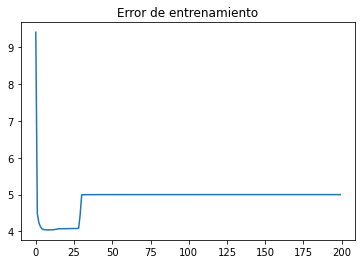

In [ ]:
#-
import matplotlib.pyplot as plt
plt.plot(errorVec)
plt.title("Error de entrenamiento")

In [ ]:
#-
import math
def errorRNN(x,t):
  error=0
  emc=0
  for i in range(0,x.shape[0]):
    xi=x[i]
    ti=t[i]
    y,entredaNetaCS,entradaNetaC7, entradaNetaC6, entradaNetaC5, entradaNetaC4, entradaNetaC3,entradaNetaC2,entradaNetaC1=neurona(xi,pesosCO1,tc1,pesosCO2,tc2,pesosCO3,tc3,pesosCO4,tc4, pesosCO5,tc5, pesosCO6,tc6, pesosCO7,tc7,pesosCS, tcs)
    
    emc=pow((ti-y),2)/2
    if int(round(y[0],0))!=ti:
      error+=1

  error=(error/x.shape[0])*100

  return error, emc

In [ ]:
#-
error,emc=errorRNN(x_test, y_test)
print(error,emc)

30.434782608695656 [3.14474529e-17]


In [ ]:
#-
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(neuronasC1, neuronasC2,neuronasC3,neuronasC4,neuronasC5,neuronasC6,neuronasC7),random_state=1)
clf.fit(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 4, 3, 4, 4, 3, 2),
              random_state=1, solver='lbfgs')

In [ ]:
#codigo ultimo.
clf.score(x_test, y_test)

0.7391304347826086